In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd

In [10]:
# Load dataset (Kaggle's Digit Recognizer dataset)
dataset = pd.read_csv("C:\\Users\\wilfr\\Downloads\\train.csv")   # Make sure 'train.csv' is in the same directory as your notebook

data = dataset.iloc[:, 1:].values  # Pixel values
labels = dataset.iloc[:, 0].values  # Digits (0-9)



In [11]:
# Normalize pixel values (0-255 -> 0-1)
data = data / 255.0

# One-hot encode labels
labels = to_categorical(labels, num_classes=10)

# Split dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])



C:\Users\wilfr\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile model
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate accuracy
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")




Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8564 - loss: 0.5057 - val_accuracy: 0.9454 - val_loss: 0.1851
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9559 - loss: 0.1438 - val_accuracy: 0.9613 - val_loss: 0.1290
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9717 - loss: 0.0936 - val_accuracy: 0.9661 - val_loss: 0.1100
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9796 - loss: 0.0717 - val_accuracy: 0.9674 - val_loss: 0.1084
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9832 - loss: 0.0562 - val_accuracy: 0.9671 - val_loss: 0.1209
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9869 - loss: 0.0435 - val_accuracy: 0.9744 - val_loss: 0.1048
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9898 - loss: 0.0350 - val_accuracy: 0.9731 - val_loss: 0.1056
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9916 - loss: 0.0289 - 

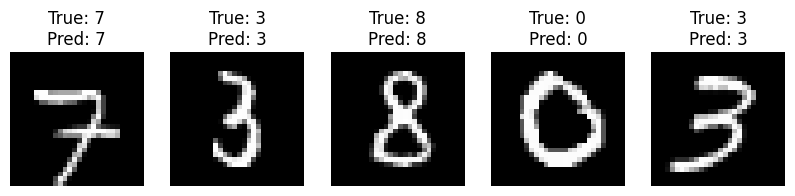

In [13]:
# Visualize sample predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    index = np.random.randint(0, len(x_test))
    img = x_test[index].reshape(28, 28)
    true_label = np.argmax(y_test[index])
    pred_label = np.argmax(model.predict(x_test[index].reshape(1, -1), verbose=0))
    
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.show()